In [3]:
! git clone https://www.github.com/sterlinggutterman/Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 53 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 37.34 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_parquet('Final-Project/full_df (2).parquet')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages
3,1662354,27,prior,2,2,17,6.0,6287,3,0,no,monday,81,Organic & Raw Strawberry Serenity Kombucha,31,7,refrigerated,beverages
4,1662354,27,prior,2,2,17,6.0,20947,4,0,no,monday,81,Passionberry Bliss Kombucha Drink,31,7,refrigerated,beverages


In [5]:
df=df.drop(columns=["eval_set"])

In [6]:
import pickle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
for each in df.columns:
    df[each]=df[each].fillna(0)

In [8]:
from sklearn import linear_model

# Target variable:
y = df['reordered']

# Numeric:
var_num = ['order_id', 'user_id', 'order_number', 'days_since_prior_order',
       'order_hour_of_day', 'order_dow', 'add_to_cart_order',
        'total_order_count']
X_num = df.loc[:,var_num]

# Dummies:
var_cat = ['reordered_yes/no', 'order_day','department']
dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1)

# Create covariates:
X = pd.concat([X_num, dummies],axis=1)

# Scale data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [9]:
def demean(x):
    xbar = np.mean(x)
    z = x-xbar
    return(z)
Z=X.apply(demean)
X_mean=X.mean().to_numpy() 

In [10]:
C = Z.cov()
eigenvalues, eigenvectors = np.linalg.eig(C)
eig_val = eigenvalues[ np.argsort(-eigenvalues) ]
eig_vect = eigenvectors[ :, np.argsort(-eigenvalues) ]
x_means = X_mean[ np.argsort(-eigenvalues) ] 
eig_val = eig_val/np.sum(eig_val)
eig_vect = eig_vect

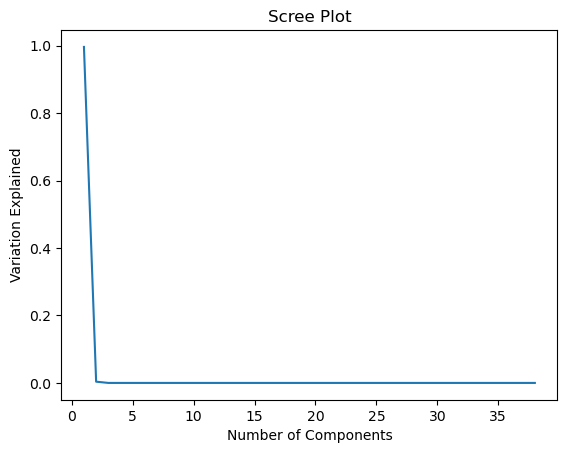

In [11]:
import numpy as np
x = np.linspace(1, Z.shape[1],Z.shape[1])
y = eig_val
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variation Explained")
plt.title('Scree Plot')
plt.show()

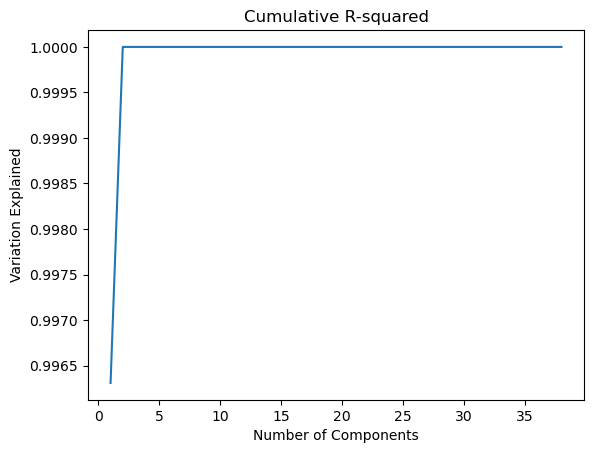

In [13]:
# R^2 plot:
x = np.linspace(1, Z.shape[1],Z.shape[1])
y = np.cumsum(eig_val)
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variation Explained")
plt.title('Cumulative R-squared')
plt.show()